<a href="https://www.kaggle.com/code/shubhamgupta012/top-gaming-laptops-eda?scriptVersionId=133139362" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unveiling-the-top-gaming-laptops/lapdata.csv
/kaggle/input/unveiling-the-top-gaming-laptops/lapdata.xlsx


In [2]:
df = pd.read_excel('/kaggle/input/unveiling-the-top-gaming-laptops/lapdata.xlsx')
df.head()

,Product,Processor,Ram,Memory,OS,Size,Price
0,MSI Stealth GS77 12UHS-226IN,12th Gen Core i9,32 GB DDR5 RAM,2 TB SSD,Windows 11 OS,17.3 inches,"3,00,990"
1,MSI Titan GT77 HX 13VI-092IN,13th Gen Intel Core i9 13980HX,64 GB DDR5 RAM,4 TB SSD,Windows 11 OS,17.3 inches,"5,99,990"
2,Acer Predator Helios 500 Ph517-52,11th Gen Intel Core i9 11980HK,64 GB DDR4 RAM,2 TB SSD,Windows 10 OS,17.3 inches,"4,42,605"
3,MSI Titan GT77 HX 13VH-093IN,13th Gen Intel Core i9 13980HX,64 GB DDR5 RAM,2 TB SSD,Windows 11 OS,17.3 inches,"4,89,990"
4,MSI Stealth GS66 12UGS-290IN,12th Gen Intel Core i7 12700H,32 GB DDR5 RAM,1 TB SSD,Windows 11 OS,15.6 inches,"1,95,990"


In [3]:
df.shape

(49, 7)

In [4]:
df.describe()

,Product,Processor,Ram,Memory,OS,Size,Price
count,49,49,49,49,49,49,49
unique,47,24,9,4,2,8,46
top,Asus UX581LV-H2035T,12th Gen Intel Core i7 12700H,32 GB DDR5 RAM,1 TB SSD,Windows 11 OS,15.6 inches,"1,61,990"
freq,2,9,21,22,45,14,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Product    49 non-null     object
 1   Processor  49 non-null     object
 2   Ram        49 non-null     object
 3   Memory     49 non-null     object
 4   OS         49 non-null     object
 5   Size       49 non-null     object
 6   Price      49 non-null     object
dtypes: object(7)
memory usage: 2.8+ KB


In [6]:
df.dtypes

Product      object
Processor    object
Ram          object
Memory       object
OS           object
Size         object
Price        object
dtype: object

In [7]:
df.isnull().sum()

Product      0
Processor    0
Ram          0
Memory       0
OS           0
Size         0
Price        0
dtype: int64

In [8]:
df[df.duplicated()==True]

,Product,Processor,Ram,Memory,OS,Size,Price
20,Asus UX581LV-H2035T,10th Gen Intel Core i9 10980HK,32 GB DDR4 RAM,1 TB SSD,Windows 10 OS,15.6 inches,"1,61,990"


In [9]:
df['Product'].value_counts()

Asus UX581LV-H2035T                                   2
Dell XPS 9720                                         2
MSI Stealth GS77 12UHS-226IN                          1
Asus Vivobook 16X 2022 M1603QA-MB502WS                1
Acer Predator Triton 500 SE PT516-52s NH.QFQSI.001    1
Asus ROG Zephyrus S15 GX502LXS-HF081T                 1
Asus ROG Strix G17 2023 G713PU-LL060WS                1
Asus ROG Zephyrus G16 2023 GU603VV-N4044WS            1
Asus ROG Strix Scar 17 2023 G733PZ-LL046WS            1
MSI Raider GE77HX 12UHS-205IN                         1
Razer Blade 15 Advanced Gaming Laptop                 1
HP Victus 16-d0333TX                                  1
Asus Vivobook 16X 2023 K3605VC-MB951WS                1
Asus ROG Strix Scar 15 G533ZXZ-LN116WS                1
HP Victus 15-fb0106AX                                 1
Asus TUF Gaming A15 FA506IHRZ-HN111W                  1
HP Victus 15-fb0121AX                                 1
Lenovo IdeaPad Gaming 3 15IHU6 82K101B6IN       

In [10]:
df['Processor'].value_counts()

12th Gen Intel Core i7 12700H     9
12th Gen Intel Core i9 12900HX    3
7th Gen AMD Ryzen 9 7945HX        3
12th Gen Intel Core i9 12900H     3
6th Gen AMD Ryzen 9 6900HX        3
13th Gen Intel Core i9 13980HX    3
5th Gen AMD Ryzen 5 5600H         3
13th Gen Intel Core i9 13900H     3
11th Gen Intel Core i5 11400H     2
10th Gen Intel Core i9 10980HK    2
7th Gen AMD Ryzen 9 7940HS        2
12th Gen Core i9                  1
12th Gen Intel Core i3 1215U      1
6th Gen AMD Ryzen 7 6800H         1
11th Gen Intel Core i5 11320H     1
4th Gen AMD Ryzen 5 4600H         1
6th Gen AMD Ryzen 9 6900HS​       1
10th Gen Intel Core i7-10875H     1
7th Gen AMD Ryzen 9 7845HX        1
10th Gen Intel Core i7 10875H     1
12th Gen Intel Core i9 12900HK    1
5th Gen AMD Ryzen 9 5980HS        1
11th Gen Intel Core i9 11980HK    1
13th Gen Intel Core i7 13700H     1
Name: Processor, dtype: int64

In [11]:
df['Ram'].value_counts()

32 GB DDR5 RAM       21
16 GB DDR4 RAM        6
8 GB DDR4 RAM         6
64 GB DDR5 RAM        4
16 GB DDR5 RAM        4
32 GB DDR4 RAM        4
32 GB LPDDR5 RAM      2
64 GB DDR4 RAM        1
32 GB LPDDR4X RAM     1
Name: Ram, dtype: int64

In [12]:
df['Memory'].value_counts()

1 TB SSD      22
2 TB SSD      15
512 GB SSD    11
4 TB SSD       1
Name: Memory, dtype: int64

In [13]:
df['OS '].value_counts()

Windows 11 OS    45
Windows 10 OS     4
Name: OS , dtype: int64

In [14]:
df['Size'].value_counts()

15.6 inches    14
16 inches      13
17.3 inches    11
14 inches       3
16.1 inches     3
17 inches       2
13.4 inches     2
15.6 inches     1
Name: Size, dtype: int64

In [15]:
df = df.drop_duplicates()

In [16]:
df.shape

(48, 7)

In [17]:
df.head()

,Product,Processor,Ram,Memory,OS,Size,Price
0,MSI Stealth GS77 12UHS-226IN,12th Gen Core i9,32 GB DDR5 RAM,2 TB SSD,Windows 11 OS,17.3 inches,"3,00,990"
1,MSI Titan GT77 HX 13VI-092IN,13th Gen Intel Core i9 13980HX,64 GB DDR5 RAM,4 TB SSD,Windows 11 OS,17.3 inches,"5,99,990"
2,Acer Predator Helios 500 Ph517-52,11th Gen Intel Core i9 11980HK,64 GB DDR4 RAM,2 TB SSD,Windows 10 OS,17.3 inches,"4,42,605"
3,MSI Titan GT77 HX 13VH-093IN,13th Gen Intel Core i9 13980HX,64 GB DDR5 RAM,2 TB SSD,Windows 11 OS,17.3 inches,"4,89,990"
4,MSI Stealth GS66 12UGS-290IN,12th Gen Intel Core i7 12700H,32 GB DDR5 RAM,1 TB SSD,Windows 11 OS,15.6 inches,"1,95,990"


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([11., 13., 13.,  0.,  2.,  2.,  0.,  3.,  1.,  3.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

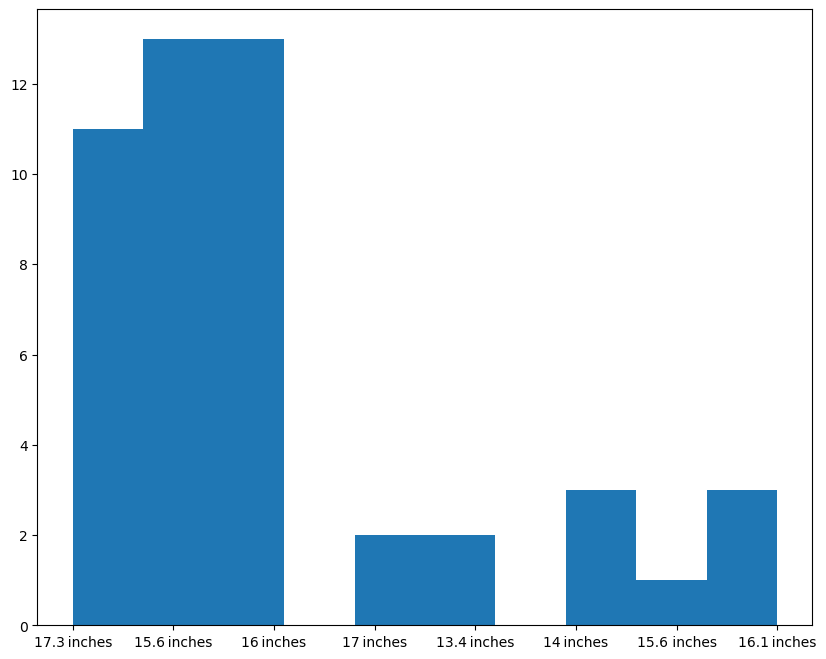

In [19]:
plt.figure(figsize=(10,8))
plt.hist(df['Size'])

(array([45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

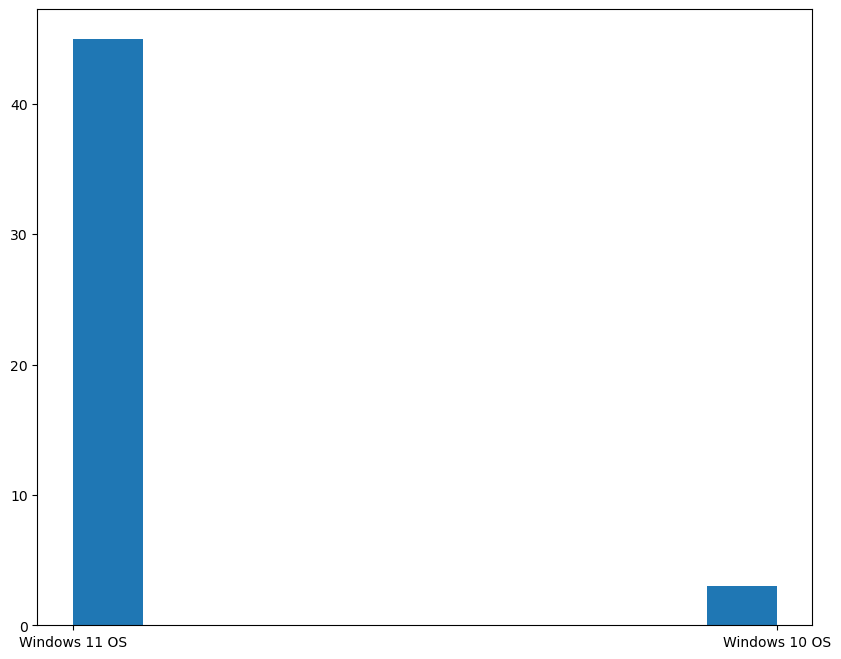

In [20]:
plt.figure(figsize=(10,8))
plt.hist(df['OS '])

(array([15.,  0.,  0.,  1.,  0.,  0., 21.,  0.,  0., 11.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

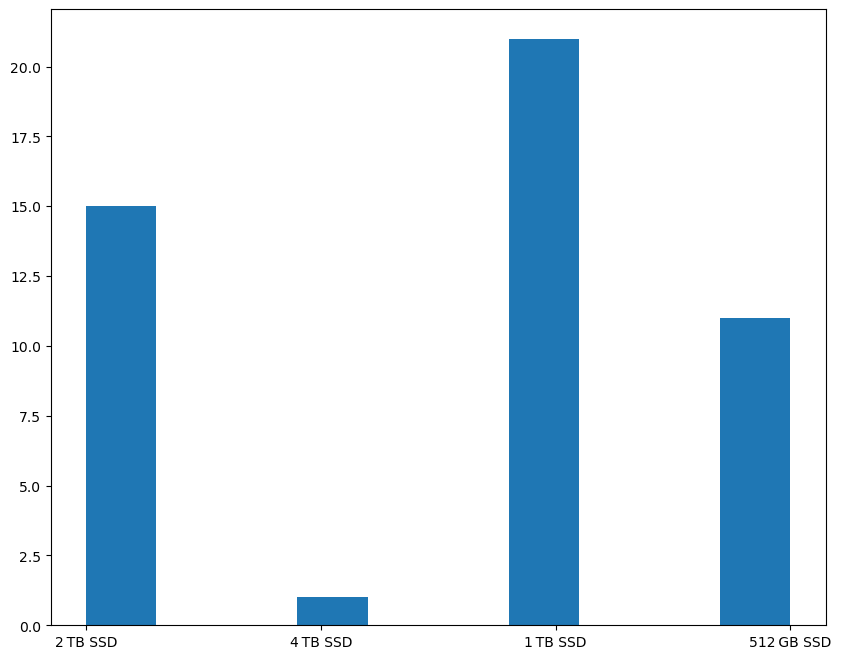

In [21]:
plt.figure(figsize=(10,8))
plt.hist(df['Memory'])

(array([21.,  4.,  1.,  4.,  0.,  2.,  3.,  1.,  6.,  6.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

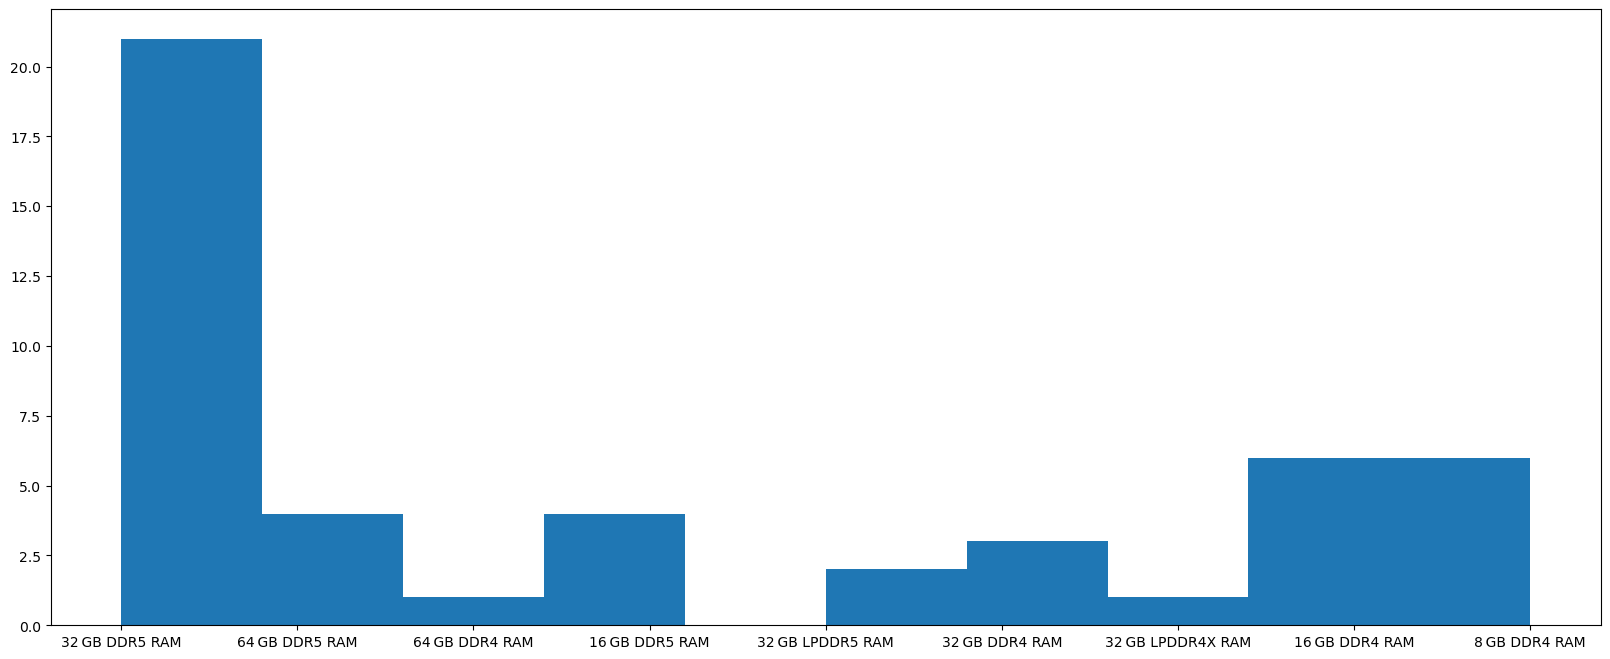

In [22]:
plt.figure(figsize=(20,8))
plt.hist(df['Ram'])

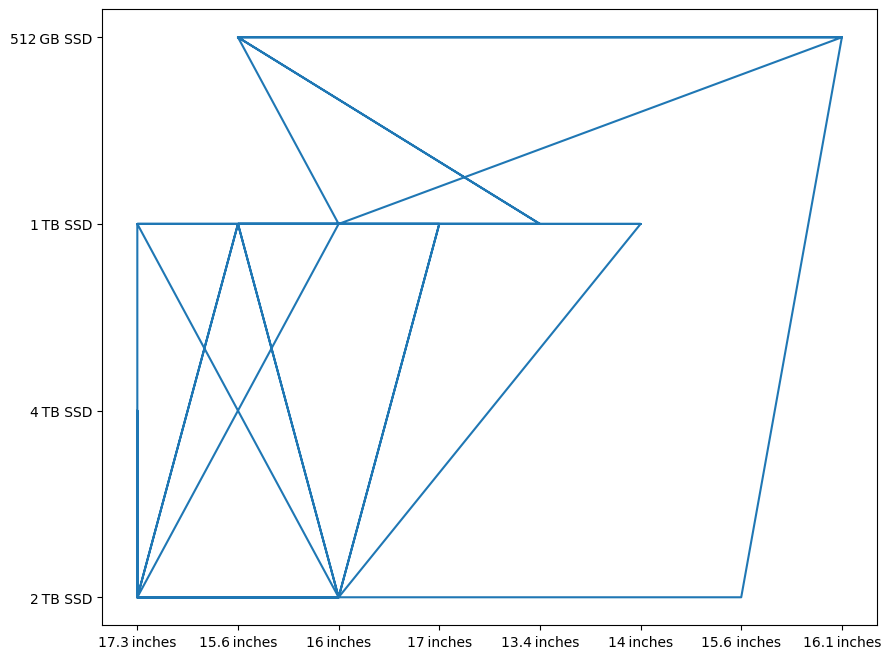

In [23]:
plt.figure(figsize=(10,8))
plt.plot(df['Size'],df['Memory'])

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
df['Size']=le.fit_transform(df['Size'])
df['Memory'] = le.fit_transform(df['Memory'])
df['OS '] = le.fit_transform(df['OS '])
df['Ram'] = le.fit_transform(df['Ram'])
df['Processor'] = le.fit_transform(df['Processor'])

In [26]:
df.head()

,Product,Processor,Ram,Memory,OS,Size,Price
0,MSI Stealth GS77 12UHS-226IN,6,3,1,1,6,"3,00,990"
1,MSI Titan GT77 HX 13VI-092IN,14,7,2,1,6,"5,99,990"
2,Acer Predator Helios 500 Ph517-52,5,6,1,0,6,"4,42,605"
3,MSI Titan GT77 HX 13VH-093IN,14,7,1,1,6,"4,89,990"
4,MSI Stealth GS66 12UGS-290IN,8,3,0,1,3,"1,95,990"


In [27]:
X = df.iloc[:,1:6]
X.head()

,Processor,Ram,Memory,OS,Size
0,6,3,1,1,6
1,14,7,2,1,6
2,5,6,1,0,6
3,14,7,1,1,6
4,8,3,0,1,3


In [28]:
# df['Price'] = df['Price'].astype('int')

In [29]:
Y = df.iloc[:,-1]
Y.head()

0    3,00,990
1    5,99,990
2    4,42,605
3    4,89,990
4    1,95,990
Name: Price, dtype: object

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [31]:
X_train.shape,Y_train.shape

((38, 5), (38,))

In [32]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train,Y_train)